Simple Linear Regression


The task is to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data from file
data=pd.read_csv(r'C:\Users\RUSHI\Desktop\sparks\student_scores - student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#check missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

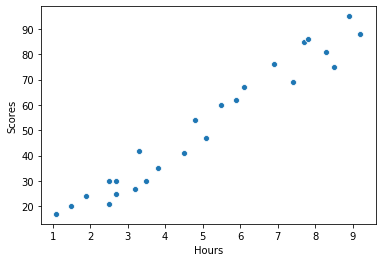

In [5]:
# Plotting the distribution of scores
sns.scatterplot(data['Hours'],data['Scores'])

# prepare Data

In [6]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values  

In [7]:
#divide data into train and test 
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2, random_state=0)

In [8]:
#train the model
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(xtr,ytr)
print("training completed")

training completed


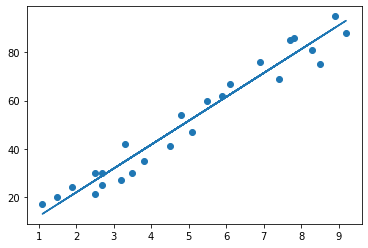

In [9]:
# Plotting the regression line
line = model1.coef_*x+model1.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [10]:
#make prediction
ypre1=model1.predict(xts)

In [11]:
df = pd.DataFrame({'Actual': yts, 'Predicted': ypre1})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(yts,ypre1)

21.5987693072174

In [13]:
mean_absolute_error(yts,ypre1)

4.183859899002975

# What percentage of marks will a student get if he/she studies for 9.25 hrs?

In [14]:

hours = [[9.25]]
own_pred = model1.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Model Evaluation

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(yts, ypre1)) 

Mean Absolute Error: 4.183859899002975
